## Faculty_Notebook-Day02_Random-Forest

### **Data Set Information :**
    
    The Breast Cancer (Wisconsin) Diagnosis dataset [1] contains the diagnosis and a set of 30 features describing the characteristics of the cell nuclei present in the digitized image of a of a fine needle aspirate (FNA) of a breast mass. Ten real-valued features are computed for each cell nucleus:
    
1.id	2.diagnosis	radius_mean	texture_mean	perimeter_mean	area_mean	smoothness_mean	compactness_mean	concavity_mean	concave points_mean	symmetry_mean	fractal_dimension_mean	radius_se	texture_se	perimeter_se	area_se	smoothness_se	compactness_se	concavity_se	concave points_se	symmetry_se	fractal_dimension_se	radius_worst	texture_worst	perimeter_worst	area_worst	smoothness_worst	compactness_worst	concavity_worst	concave points_worst	symmetry_worst	fractal_dimension_worst


    radius (mean of distances from center to points on the perimeter);
    texture (standard deviation of gray-scale values);
    perimeter;
    area;
    smoothness (local variation in radius lengths);
    compactness (perimeter^2 / area - 1.0);
    concavity (severity of concave portions of the contour);
    concave points (number of concave portions of the contour);
    symmetry;
    fractal dimension ("coastline approximation" - 1).
    The mean, standard error (SE) and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

## Data Understanding

### 1.1 Load the libraries:

In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import warnings
warnings.filterwarnings("ignore")

In [132]:
import os
os.chdir('C:\\Users\\DILIP\\Downloads\\SLC\\SLC-DAY3\\Faculty Note')


### 1.2. Import the dataset(data.csv):

In [133]:
breast_cancer = pd.read_csv('data.csv')
names = ['id', 'diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 
         'concavity_mean','concave_points_mean', 
         'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 
         'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 
         'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 
         'concavity_worst', 'concave_points_worst', 
         'symmetry_worst', 'fractal_dimension_worst'] 

dx = ['Benign', 'Malignant']

###  1.3 Label encoding

In [134]:
# Setting 'id_number' as our index
breast_cancer.set_index(['id'], inplace = True) 

breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map({'M':1, 'B':0})

### 1.4 check the Missing Values

In [135]:
breast_cancer.apply(lambda x: x.isnull().sum())

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

We have to delete this extra column since it doesn't contain any data.

This following code will be used for the random forest model, where the id_number won't be relevant.

In [136]:
# For later use in CART models
names_index = names[2:]

In [137]:
percent_missing = breast_cancer.isnull().sum() * 100 / len(breast_cancer)
percent_missing

diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_worst               0.0
fractal_di

In [138]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se         

### 1.5 Here we're deleting the extra column

In [139]:
del breast_cancer['Unnamed: 32']

### 1.6 the data set utilizing the head() function which will give the first 5 values of our data frame?

In [140]:
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1.7 The dimensions of the data set; where the first value is the number of patients and the second value is the number of features.

In [141]:
print("Here's the dimensions of our data frame:\n", 
     breast_cancer.shape)
print("Here's the data types of our columns:\n",
     breast_cancer.dtypes)

Here's the dimensions of our data frame:
 (569, 31)
Here's the data types of our columns:
 diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64

### 1.8 Check Class Imbalance:
    
The distribution of diagnoses is important because it speaks to class imbalance within machine learning and data mining applications. Class imbalance is a term used to describe when a target class within a data set is outnumbered by another target class (or classes). 

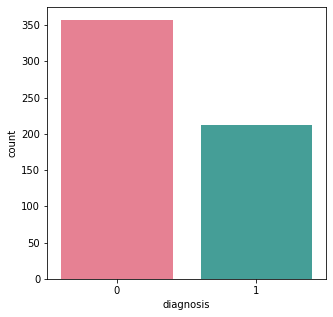

In [142]:
plt.figure(figsize=(5,5))
sns.countplot(breast_cancer['diagnosis'],  palette = "husl")

this data set does not suffer from class imbalance.

### 1.9 standard descriptive statistics for each feature including mean, standard deviation, minimum value, maximum value, and range intervals.

In [143]:
breast_cancer.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 1.10 Creating Training and Test Sets

In [144]:
X = breast_cancer.iloc[:, breast_cancer.columns != 'diagnosis']
Y = breast_cancer.iloc[:, breast_cancer.columns == 'diagnosis']

### 1.11 splitting the train and test (80/20)

In [145]:
training_set, test_set, class_set, test_class_set = train_test_split(X,Y,test_size = 0.20,random_state = 42)

### 1.12 Fitting Random Forest
    
Now, let's create the model, starting with parameter tuning. Here are the parameters we will be tuning in this tutorial:

**max_depth:** The maximum splits for all trees in the forest. 

**bootstrap:** An indicator of whether or not we want to use bootstrap samples when building trees.

**max_features:** The maximum number of features that will be used in node splitting — the main difference I previously mentioned between bagging trees and random forest. Typically, you want a value that is less than p, where p is all features in your data set.

**criterion:** This is the metric used to asses the stopping criteria for the decision trees.

In [146]:
fit_rf = RandomForestClassifier(random_state=42)

### 1.13 Cheking Hyperparameters Optimization:
    
Utilizing the GridSearchCV functionality, let's create a dictionary with parameters we are looking to optimize to create the best model for our data

In [147]:
import time
import random
np.random.seed(42)
start = time.time()

# auto = sqrt are same
param_dist = {'max_depth': [2, 3, 4],'bootstrap': [True, False],'max_features': ['auto', 'log2'],'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,param_grid=param_dist, n_jobs = 3)

cv_rf.fit(training_set, class_set)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2'}
Time taken in grid search:  55.21


Once we are given the best parameter combination, we set the parameters to our model.

Notice how we didn't utilize the bootstrap: True parameter, this will make sense in the following section.

### 1.14 Set best parameters given by grid search 

In [148]:
fit_rf.set_params(criterion = 'gini',max_features = 'log2',max_depth = 3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### 1.14 Out of Bag Error Rate:
    
Another useful feature of random forest is the concept of an out-of-bag (OOB) error rate. Because only two-thirds of the data are used to train each tree when building the forest, one-third of unseen data can be used in a way that is advantageous to our accuracy metrics without being as computationally expensive as something like cross validation, for instance.

In [149]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(training_set, class_set)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

###  1.15 Convert dictionary to a pandas series for easy plotting 

In [151]:
oob_series = pd.Series(error_rate)
oob_series

15      0.054945
16      0.052747
17      0.048352
18      0.039560
19      0.046154
20      0.052747
21      0.048352
22      0.046154
23      0.050549
24      0.046154
25      0.048352
26      0.052747
27      0.057143
28      0.043956
29      0.043956
30      0.048352
31      0.046154
32      0.046154
33      0.046154
34      0.052747
35      0.054945
36      0.054945
37      0.052747
38      0.050549
39      0.054945
40      0.057143
41      0.050549
42      0.050549
43      0.048352
44      0.050549
          ...   
971     0.050549
972     0.050549
973     0.050549
974     0.050549
975     0.050549
976     0.050549
977     0.050549
978     0.050549
979     0.050549
980     0.050549
981     0.050549
982     0.050549
983     0.050549
984     0.050549
985     0.050549
986     0.050549
987     0.050549
988     0.050549
989     0.050549
990     0.050549
991     0.050549
992     0.050549
993     0.050549
994     0.050549
995     0.050549
996     0.050549
997     0.050549
998     0.0505

### 1.16 plotting the OOB error plot

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

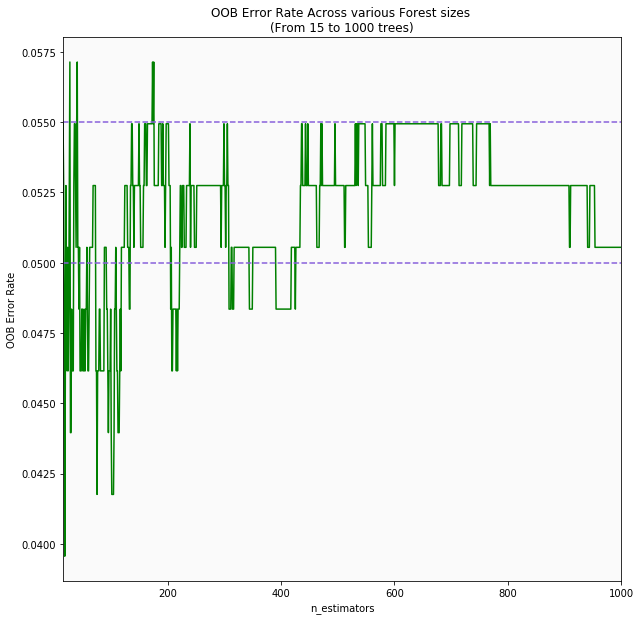

In [152]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',
                color = 'green')
plt.axhline(0.055, 
            color='#875FDB',
           linestyle='--')
plt.axhline(0.05, 
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [153]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[400]))

OOB Error rate for 400 trees is: 0.04835


Utilizing the OOB error rate that was created with the model gives us an unbiased error rate. Since OOB can be calculated with the model estimation, it's helpful when cross validating and/or optimizing hyperparameters prove to be too computationally expensive.

### 1.17  Traditional Training and Test Set Split for Random Forest

In order for this methodology to work we will set the number of trees calculated using the OOB error rate, and removing the warm_start and oob_score parameters. Along with including the bootstrap parameter.

In [154]:
fit_rf.set_params(n_estimators=400,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [155]:
# Cleaning test sets to avoid future warning messages
class_set = class_set.values.ravel() 
test_class_set = test_class_set.values.ravel()

In [156]:
fit_rf.fit(training_set, class_set)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### 1.18 Check Variable Importance

In [157]:
def variable_importance(fit):
   
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [158]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [159]:
def print_var_importance(importance, indices, name_index):
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'area_worst' has a Mean Decrease in Impurity of 0.12986
2. The feature 'perimeter_worst' has a Mean Decrease in Impurity of 0.12095
3. The feature 'concave_points_worst' has a Mean Decrease in Impurity of 0.11555
4. The feature 'concave_points_mean' has a Mean Decrease in Impurity of 0.10014
5. The feature 'radius_worst' has a Mean Decrease in Impurity of 0.07805
6. The feature 'concavity_mean' has a Mean Decrease in Impurity of 0.06214
7. The feature 'area_mean' has a Mean Decrease in Impurity of 0.05656
8. The feature 'radius_mean' has a Mean Decrease in Impurity of 0.05457
9. The feature 'perimeter_mean' has a Mean Decrease in Impurity of 0.05174
10. The feature 'area_se' has a Mean Decrease in Impurity of 0.04326
11. The feature 'concavity_worst' has a Mean Decrease in Impurity of 0.03866
12. The feature 'compactness_worst' has a Mean Decrease in Impurity of 0.02033
13. The feature 'compactness_mean' has a Mean Decrease in Impurity of 0.01616
14. The

We can see here that our top 5 variables were area_worst, perimeter_worst, concave_points_worst, concave_points_mean, radius_worst.

In [160]:
def variable_importance_plot(importance, indices, name_index):
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

    plt.title('Feature importances for Random Forest Model\
    \nBreast Cancer (Diagnostic)')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 30)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

### 1.19 plotting the importance_plot 

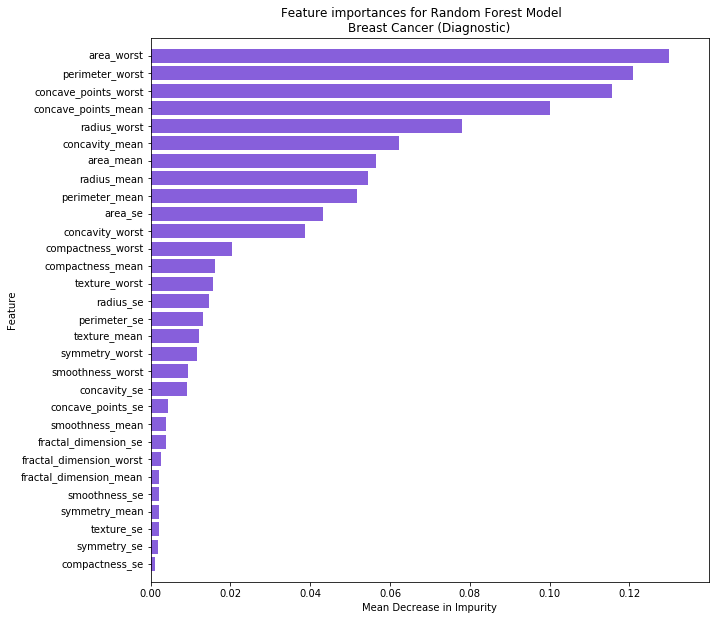

In [161]:
variable_importance_plot(importances_rf, indices_rf, names_index)

### 1.20 Check Cross Validation

Cross validation is a powerful tool that is used for estimating the predictive power of your model, and it performs better than the conventional training and test set. Using cross validation, we can create multiple training and test sets and average the scores to give us a less biased metric.

### 1.21 checking the  K-Fold Cross Validation:

In [162]:
def cross_val_metrics(fit, training_set, class_set, estimator, print_results = True):
    my_estimators = {
    'rf': 'estimators_',
    'nn': 'out_activation_',
    'knn': '_fit_method'
    }
    try:
        # Captures whether first parameter is a model
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)[my_estimators[estimator]]:
            return print("Model does not appear to be trained.")

    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    n = KFold(n_splits=10)
    scores = cross_val_score(fit, 
                         training_set, 
                         class_set, 
                         cv = n)
    if print_results:
        for i in range(0, len(scores)):
            print("Cross validation run {0}: {1: 0.3f}".format(i, scores[i]))
        print("Accuracy: {0: 0.3f} (+/- {1: 0.3f})"\
              .format(scores.mean(), scores.std() / 2))
    else:
        return scores.mean(), scores.std() / 2

In [163]:
cross_val_metrics(fit_rf, 
                  training_set, 
                  class_set, 
                  'rf',
                  print_results = True)

Cross validation run 0:  1.000
Cross validation run 1:  0.957
Cross validation run 2:  0.935
Cross validation run 3:  0.935
Cross validation run 4:  0.957
Cross validation run 5:  0.978
Cross validation run 6:  0.933
Cross validation run 7:  0.889
Cross validation run 8:  1.000
Cross validation run 9:  0.889
Accuracy:  0.947 (+/-  0.019)


### 1.22 Test Set Metrics

Using the test set that was created earlier, let's examine another metric for the evaluation of our model. You'll recall that that we didn't touch the test set until now — after we had completed hyperparamter optimization — to avoid the problem of data leakage.

In [164]:
predictions_rf = fit_rf.predict(test_set)

### 1.23 Confusion Matrix

In [165]:
def create_conf_mat(test_class_set, predictions):
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

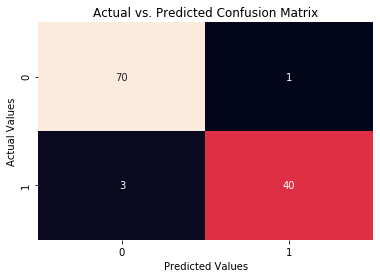

In [166]:
conf_mat = create_conf_mat(test_class_set, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [167]:
accuracy_rf = fit_rf.score(test_set, test_class_set)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.965


In [168]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.0351


###  1.24 ROC Curve Metrics
    
A receiver operating characteristic (ROC) curve calculates the false positive rates and true positive rates across different thresholds. Let's graph these calculations.

In [169]:
predictions_prob = fit_rf.predict_proba(test_set)[:, 1]

fpr2, tpr2, _ = roc_curve(test_class_set,predictions_prob,pos_label = 1)

In [170]:
auc_rf = auc(fpr2, tpr2)

In [171]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    my_estimators = {'Decision tree': ['Decision tree', 'Great Learning'],
              'rf': ['Random Forest', 'red']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

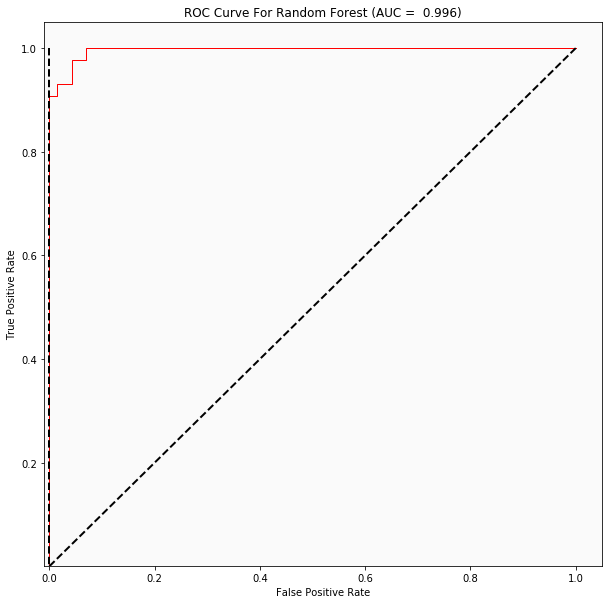

In [172]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

Our model did exceptional with an AUC over .90, now we do a zoomed in view to showcase the closeness our ROC Curve is relative to the ideal ROC Curve.

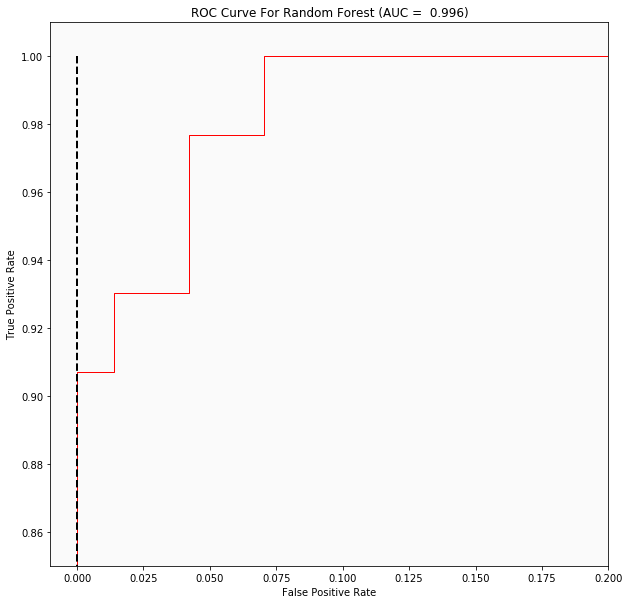

In [173]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf', 
               xlim=(-0.01, 0.2), 
               ylim=(0.85, 1.01))

### 1.25  Classification Report
    
The classification report is available through sklearn.metrics, this report gives many important classification metrics including:

    Precision: also the positive predictive value, is the number of correct predictions divided by the number of correct predictions plus false positives, so  tp/(tp+fp) 
    Recall: also known as the sensitivity, is the number of correct predictions divided by the total number of instances so  tp/(tp+fn)  where  fn  is the number of false negatives
    f1-score: this is defined as the weighted harmonic mean of both the precision and recall, where the f1-score at 1 is the best value and worst value at 0, as defined by the documentation
    support: number of instances that are the correct target values

In [174]:
def print_class_report(predictions, alg_name):
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions, 
            test_class_set, 
            target_names = dx))
class_report = print_class_report(predictions_rf, 'Random Forest')


Classification Report for Random Forest:
              precision    recall  f1-score   support

      Benign       0.99      0.96      0.97        73
   Malignant       0.93      0.98      0.95        41

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



### 1.26 Metrics for Random Forest

# ----------------------------------- HAPPY LEARNING --------------------------------------------